# 1. UNDERSTANDING THE BUISNESS PROBLEM


The aim of the problem is to predict the insurance premium charge for an employee.

- Features available are:
 
 **Categorical**
    - smoker: yes/no
    - region: residential area.
    - sex: male/female
  
  **Numeric**
    - bmi: Body mass index (18.5 to 24.9)
    - children: No of childrens 
    - charges: Insurance Premium Charges


Data Source:https://www.kaggle.com/mirichoi0218/insurance

# 2. IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file 
insurance_df = pd.read_csv('insurance.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Data Pre-Processing

## Data Cleaning

In [4]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

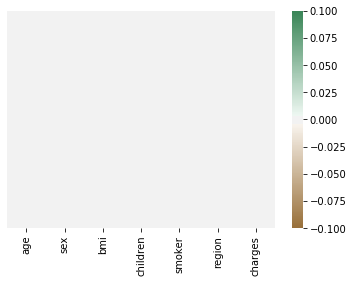

In [5]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cmap=sns.diverging_palette(50, 500, n=500))


## Data Relation

In [6]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [7]:
# Grouping data by 'age' to see the relationship between 'age' and 'charges'
# Seems like age 64 has the highest charges
df_region = insurance_df.groupby(by='age').mean()
df_region = df_region.sort_values(by='charges')
df_region.tail()

,bmi,children,charges
age,,,
43,30.204444,1.629630,19267.278653
63,31.923478,0.565217,19884.998461
60,30.332826,0.347826,21979.418507
61,32.548261,0.739130,22024.457609
64,32.976136,0.772727,23275.530837


## Encoding
Machine only understand one language that is numbers . So we need to convert the categorical data into numbers. So here we deal with that. 

We use one-hot or getdummies for column which have higher number of categories to prevent ordering.

### Label Encoding

In [8]:
sex = {
  "male": "1",
  "female": "0"
}
smoker = {
  "Yes": "1",
  "No": "0"
}

In [9]:
# Check unique values in the 'sex' column
print(insurance_df['sex'].unique())
# Check the unique values in the 'smoker' column
print(insurance_df['smoker'].unique())

['female' 'male']
['yes' 'no']


In [10]:
# convert categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [11]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [12]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Dummies

Dummy Variable Trap : 
When Two Columns are highly correlated. So we drop the first column to remove this problem.

In [13]:
def dummy_df(dataset,columnname):
    dummies = pd.get_dummies(dataset[columnname],drop_first=True)
    dataset = dataset.drop(columnname,1)
    dataset = pd.concat([dataset,dummies],axis=1)
    return dataset

In [14]:
insurance_df = dummy_df(insurance_df,'region')

In [15]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


### Statistical Analysis

In [16]:
insurance_df.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


In [17]:
print(insurance_df['age'].mean())
print(insurance_df['bmi'].mean())
print(insurance_df['charges'].mean())

39.20702541106129
30.663396860986538
13270.422265141257


# 4. Data Visualization

{'Yes': '1', 'No': '0'}


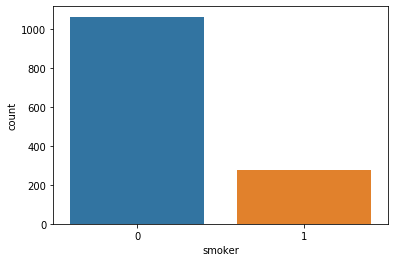

In [18]:
print(smoker)
sns.countplot(insurance_df['smoker'])
plt.show()

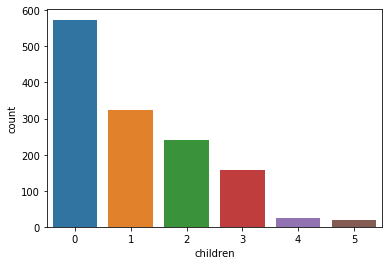

In [19]:
sns.countplot(insurance_df['children'])
plt.show()

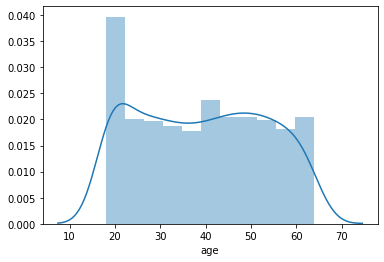

In [20]:
sns.distplot(insurance_df['age'])

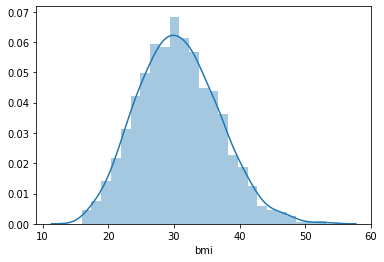

In [21]:
sns.distplot(insurance_df['bmi'])

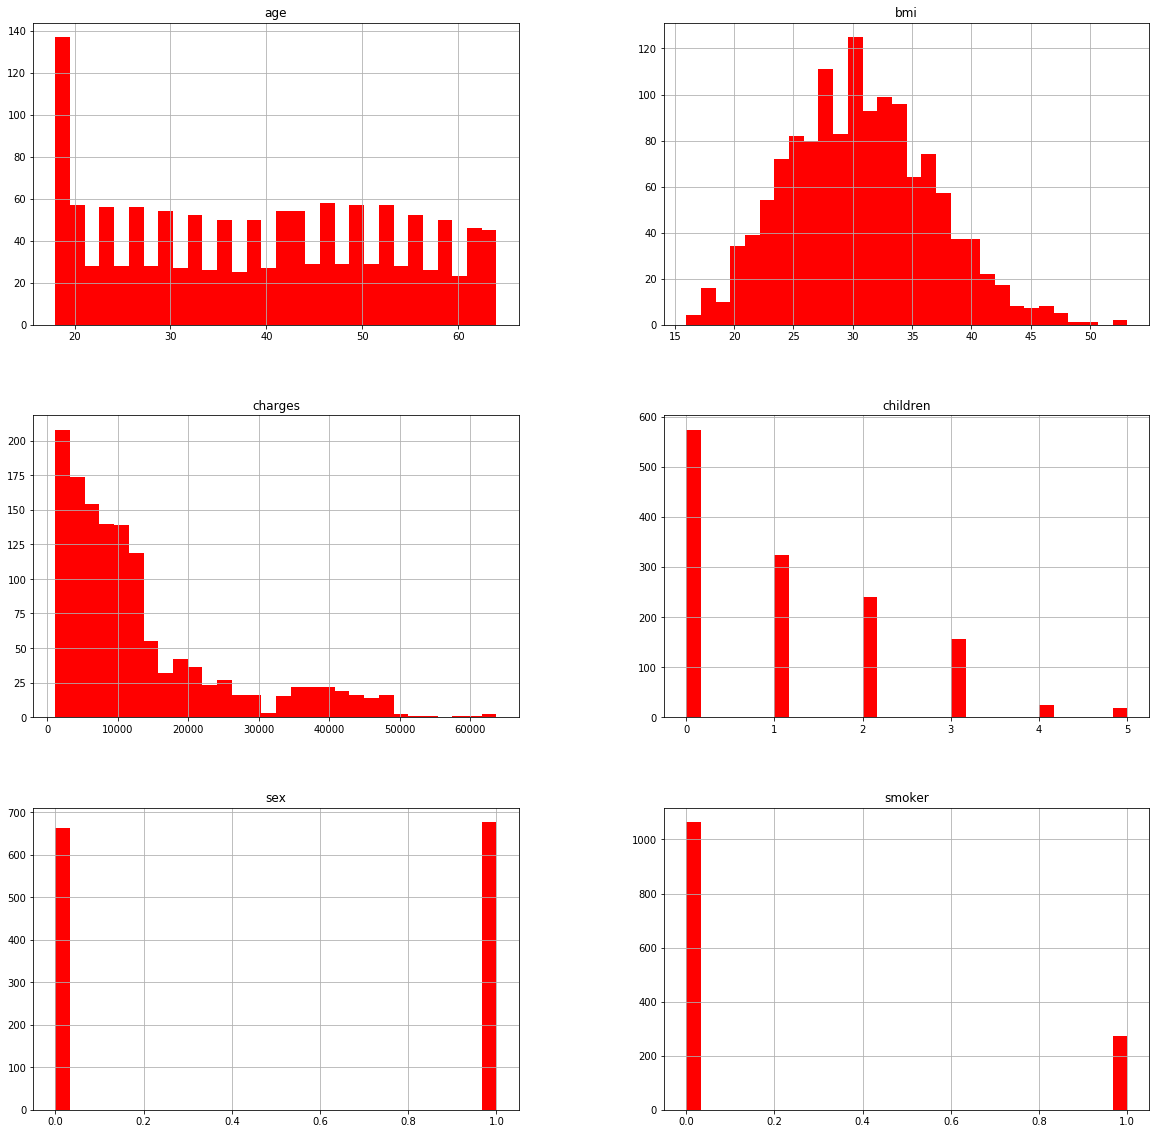

In [22]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

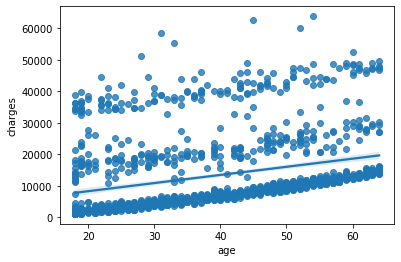

In [23]:
#Try to Fit a Decision Boundary
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()

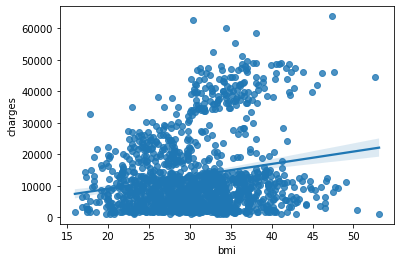

In [24]:
#Try to Fit a Decision Boundary
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

**Co-relation Matrix**

In [25]:
corr = insurance_df.corr()
corr

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


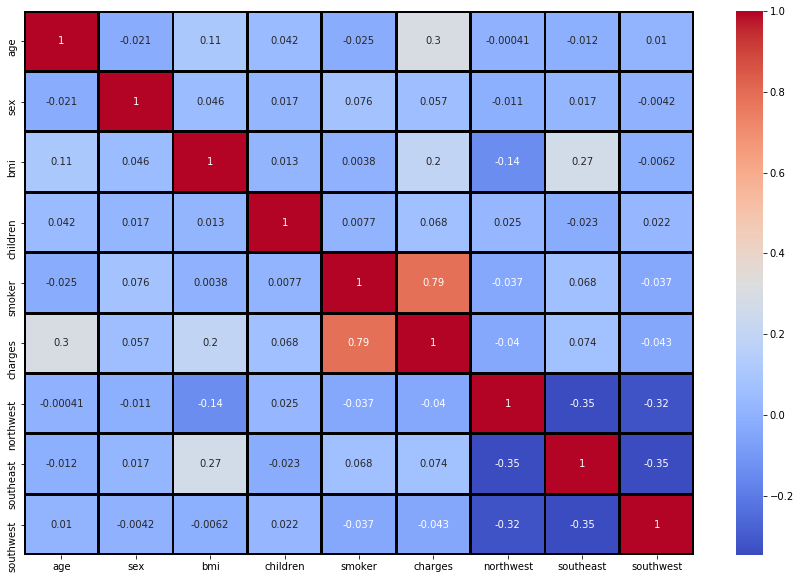

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='coolwarm',annot=True,linecolor='black', linewidths=2)

# 5. Data Splitting

## Splitting Independent & Dependent Variables 

In [27]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [28]:
#X Contain the Independent Variables
X = insurance_df.drop(columns =['charges'])
#y Contain the dependent Variables
y = insurance_df['charges']

In [29]:
print(X.shape)
print(y.shape)

(1338, 8)
(1338,)


In [30]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [31]:
y = y.reshape(-1,1)

In [32]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

## Splitting Data Into Training & Testing Set

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [37]:
#scaling the data before feeding the model
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler_x = StandardScaler()
# X_train = scaler_x.fit_transform(X_train)
# X_test = scaler_x.transform(X_test)

# scaler_y = StandardScaler()
# y_train = scaler_y.fit_transform(y_train)
# y_test = scaler_y.transform(y_test)


In [34]:
X_train

array([[37.  ,  1.  , 34.1 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 34.43, ...,  0.  ,  1.  ,  0.  ],
       [23.  ,  0.  , 36.67, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [40.  ,  1.  , 25.08, ...,  0.  ,  1.  ,  0.  ],
       [19.  ,  1.  , 35.53, ...,  1.  ,  0.  ,  0.  ],
       [33.  ,  0.  , 18.5 , ...,  0.  ,  0.  ,  1.  ]], dtype=float32)

# 6. Training & Testing using SK-LEARN

In [35]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

classifier = LinearRegression()
classifier.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
accuracy = classifier.score(X_test, y_test)
print(accuracy*100)

79.99876937113217


In [38]:
y_predict = classifier.predict(X_test)

In [42]:
#Since the Output is Scaled , So we need to convert it in original form

In [39]:
#y_predict_orig = scaler_y.inverse_transform(y_predict)
#y_test_orig = scaler_y.inverse_transform(y_test)

In [42]:
#y_test

# 6. Training & Testing using SAGEMAKER

In [43]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = 'sagemaker-premium' 
prefix = 'linear-learner' # prefix is the subfolder within the bucket.

role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::429937773353:role/service-role/AmazonSageMaker-ExecutionRole-20210616T232011


In [44]:
X_test.shape

(268, 8)

In [45]:
y_test.shape

(268, 1)

In [46]:
X_train.shape

(1070, 8)

In [47]:
y_train = y_train[:,0]

In [48]:
y_train.shape

(1070,)

In [49]:
import io
import numpy as np 
import sagemaker.amazon.common as smac

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf,X_train,y_train)
buf.seek(0)

0

In [50]:
import os

key = "linear_train_data"
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

In [51]:
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)

In [52]:
output_location = 's3://{}/{}/output'.format(bucket, prefix)

In [53]:
from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


In [54]:
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 10,
                           loss = 'absolute_loss')

linear.fit({'train': s3_train_data})

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2021-06-17 13:49:02 Starting - Starting the training job...
2021-06-17 13:49:25 Starting - Launching requested ML instancesProfilerReport-1623937742: InProgress
......
2021-06-17 13:50:26 Starting - Preparing the instances for training.........
2021-06-17 13:52:03 Downloading - Downloading input data...
2021-06-17 13:52:28 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[06/17/2021 13:52:32 INFO 139985458161472] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_b

In [55]:
linear_regressor = linear.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

---------------!

In [56]:
from sagemaker.predictor import csv_serializer, json_deserializer
from sagemaker.serializers import CSVSerializer

In [57]:
linear_regressor.serializer = CSVSerializer()
linear_regressor.deserializer = json_deserializer

In [58]:
result = linear_regressor.predict(X_test)

The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [59]:
predictions = np.array([r['score'] for r in result['predictions']])

In [61]:
#Uncomment to print
#predictions

In [62]:
linear_regressor.endpoint

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


'linear-learner-2021-06-17-13-53-15-241'

In [72]:
linear_regressor.delete_endpoint()